# Recurrent Neural Network Homework

This is the 4th assignment for CAP 4630 and we will implement a basic RNN network and an LSTM network with Keras to solve two problems. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 points, including 15 bonus points)** \
You may use Machine Learning libaries like Scikit-learn for data preprocessing.

**Task Overview:**
- Implement a basic RNN network to solve time series prediction 
- Implement an LSTM network to conduct sentiment analysis

## 1 - Implement Basic RNN network with Keras to predict time series##
### 1.1 Prepare the data (17 Points)

Prepare time series data for deep neural network training.

**Tasks:**
1. Load the given train and test data: "train.txt" and "test.txt". **(5 Points)**
2. Generate the **TRAIN** and **TEST** labels. **(5 Points)**
3. Normalize the **TRAIN** and **TEST** data with sklearn function "MinMaxScaler". **(5 Points)**
4. **PRINT OUT** the **TEST** data and label. **(2 Points)**

**Hints:**  
1. The length of original train data is 113 which starts from **"1949-01"** to **"1958-05"**. The length of original test data is 29, which starts from **"1958-07"** to **"1960-11"**. 
2. Set the data types of both train and test data to "float32". 
3. When you prepared input data X (sequences) and oupt data Y (labels), please consider the following relationship:
    - The sequence X should be the **past 12** datapoints in the time series, i.e., observation sequence with historical window of 12. You may check the time series data and think about the reason.
    - The label Y should be the **next 1** datapoint in the time series (one point ahead prediction).
4. The first 3 **TRAIN** data and label should be:

- trainX[0] = [[0.02203858 &nbsp; 0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp; 0.03856748]]
- trainY[0] = [0.03030303]

- trianX[1] = [[0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197  &nbsp; 0.08539945  &nbsp; 0.12121212  &nbsp; 0.12121212  &nbsp; 0.08815429  &nbsp; 0.04132232  &nbsp; 0.     &nbsp;  0.03856748   &nbsp; 0.03030303]]
- trainY[1] = [0.06060606]

- trainX[2] =  [[0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp;     0.03856748 &nbsp; 0.03030303 &nbsp; 0.06060606]]
- trainY[2] = [0.10192838]

5. Apply the MinMaxScaler to both the train and test data.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


6. After the preparation with scaler fitting, the shapes of trainX, trainY, testX, and testY are as follows:\
trainX.shape = (101, 1, 12)\
trainY.shape = (101,)\
testX.shape = (17, 1, 12)\
testY.shape = (17,)

In [125]:
### Import Libraries ###

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import numpy as np

### Set random seed to ensure deterministic results
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)
reset_random_seeds()

In [126]:
### Prepare and Preprocess Data Here ###
from pandas import read_csv

train_data = read_csv('train.txt')
test_data = read_csv('test.txt')

### Design a Function to Prepare Observation Sequences and Corresponding Labels ###
def create_dataset(dataset, look_back=12): # look_back is used to specify input sequence length
    dataX, dataY = [], []
    i = 0
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:i+look_back]) 
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY)


### Train and Test Data Loading with float32 type ####
dataframe_train = read_csv('train.txt', usecols=[1], engine='python') # Read train.txt 
dataset_train = dataframe_train.values
dataset_train = dataset_train.astype('float32') # Specify the data type to 'float32'

dataframe_test = read_csv('test.txt', usecols=[1], engine='python') # Read test.txt 
dataset_test = dataframe_test.values
dataset_test = dataset_test.astype('float32') # Specify the data type to 'float32'



### Scale Training and Test Data to [0, 1] ###
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) # specify the scaler
train = scaler.fit_transform(dataset_train) # fit the scaler to the training data
test = scaler.fit_transform(dataset_test) # fit the scaler to the test data

### Training and Test Data Split ###
trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)


### Training and Test Data Reshape (to fit RNN input) ###
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

trainY = np.reshape(trainY, (trainY.shape[0],))
testY = np.reshape(testY, (testY.shape[0],))

print('Shapes:')
print('trainX', trainX.shape)
print('trainY', trainY.shape)
print('testX', testX.shape)
print('testY', testY.shape)

Shapes:
trainX (101, 1, 12)
trainY (101,)
testX (17, 1, 12)
testY (17,)


In [127]:
### Print Out the TEST Data and Labels Here ###
print('textX:')
print(testX)
print('\n\ntestY:')
print(testY)

textX:
[[[0.5801282  0.625      0.30128205 0.15705132 0.         0.08653843
   0.16025639 0.1025641  0.3076923  0.27564108 0.3525641  0.5192307 ]]

 [[0.625      0.30128205 0.15705132 0.         0.08653843 0.16025639
   0.1025641  0.3076923  0.27564108 0.3525641  0.5192307  0.7628205 ]]

 [[0.30128205 0.15705132 0.         0.08653843 0.16025639 0.1025641
   0.3076923  0.27564108 0.3525641  0.5192307  0.7628205  0.798077  ]]

 [[0.15705132 0.         0.08653843 0.16025639 0.1025641  0.3076923
   0.27564108 0.3525641  0.5192307  0.7628205  0.798077   0.49038458]]

 [[0.         0.08653843 0.16025639 0.1025641  0.3076923  0.27564108
   0.3525641  0.5192307  0.7628205  0.798077   0.49038458 0.31089747]]

 [[0.08653843 0.16025639 0.1025641  0.3076923  0.27564108 0.3525641
   0.5192307  0.7628205  0.798077   0.49038458 0.31089747 0.16666663]]

 [[0.16025639 0.1025641  0.3076923  0.27564108 0.3525641  0.5192307
   0.7628205  0.798077   0.49038458 0.31089747 0.16666663 0.30448723]]

 [[0.10256

### 1.2 - Build the RNN model (20 Points) ##


Build an RNN model with SimpleRNN cell. 

**Tasks:**
1. Build an RNN model with 1 simple RNN layer and 1 Dense layer.  **(10 Points)**
2. Compile the model. **(5 Points)**
3. Train the model for **1000** epochs with **batch_size = 10**. **(5 Points)**

**Hints:**  
1. You may consider **tensorflow.keras.layers.SimpleRNN(unit_size=4)** to specify RNN cells.
2. Use loss function = 'mean_squared_error' and select **Adam** optimizer with **learning_rate=0.005** and other default settings.
3. After first epoch, the train loss is changed to around **0.0912**. 
4. The model summary is as follows:
- Total params: 73
- Trainable params: 73
- Non-trainable params: 0

In [128]:
### Build the RNN Model ###
import keras
from keras.models import Sequential

epochs = 1000
batch_size = 10

keras.backend.clear_session()

model = Sequential() # Declare Sequential class and assign it to variable "model"
model.add(keras.layers.SimpleRNN(4)) # Add a simple RNN layer with unit_size=4 in the model 
model.add(keras.layers.Dense(1)) # Add a following Dense layer with units=1 in the model 

In [129]:
### Compile the RNN Model  ###

opt = 'adam' #tf.optimizers.Adam(learning_rate=0.005)
mse_loss = 'mean_squared_error'
model.compile(optimizer=opt, loss=mse_loss) # model compiled with mean_squared_error loss and adam optimizer

In [130]:
### Train the RNN Model  ###

model.fit(x=trainX, y=trainY, batch_size=batch_size, epochs=epochs)# model fit with epoch=1000, batch_size=10; verbose=2 is optional.
model.summary() # print out model structure with model.summary()

Epoch 1/1000
11/11 [==============================] - 1s 5ms/step - loss: 0.1754
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.1121
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0695
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0433
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0317
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0268
Epoch 7/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0246
Epoch 8/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0240
Epoch 9/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0235
Epoch 10/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0230
Epoch 11/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0226
Epoch 12/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0218
Epoch 13/1000
11/11 [====

### 1.3 Evaluate Predictive Model Performance (10 Points)

Predict datapoints with the observed datapoints and trained model. 

**Tasks:**
1. Do direct prediction on train and test datapoints with the obtained model in section 1.2. **(2 Points)**
2. Scale the prediction results back to original representation with the scaler.(scaler.inverse_transform function) **(3 Points)**
3. Calculate root mean squared error (RMSE) and **print out** the error for **both TRAIN and TEST**. **(3 Points)**
4. **Plot** the **TEST** label and prediction. **(2 Points)**


**Hints:**  
1. Scale back the predictions with the build-in function "scaler.inverse_transform".\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.inverse_transform
2. For validation: Train Score: **~10.92 RMSE** Test Score: **~27.70 RMSE**
3. The plot for validation is shown below (observation test data are blue and prediction results are orange):


![](https://drive.google.com/uc?export=view&id=10c1Fsa_9v0AQf2fDpCzGPFPxbIEso81u)


In [131]:
### Make Predictions ###

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [132]:
### Scale Back Predictions ###

trainPredict = scaler.inverse_transform(trainPredict) # scale train prediction back with scaler.inverse_transform()
trainY = scaler.inverse_transform([trainY])  # scale train labels back with scaler.inverse_transform()

testPredict = scaler.inverse_transform(testPredict) # scale test prediction back with scaler.inverse_transform()
testY = scaler.inverse_transform([testY]) # scale test labels back with scaler.inverse_transform()


In [133]:
### Calculate Root Mean Squared Error (RMSE) ###
import math
from sklearn.metrics import mean_squared_error # Import mean_squared_error from sklearn.metrics

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])) 
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 9.61 RMSE
Test Score: 23.05 RMSE


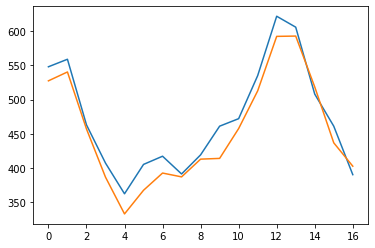

In [134]:
### Plot Observation Data and Prediction Results with TEST dataset ###

import matplotlib.pyplot as plt
plt.plot(testY[0]) # Plot Observations in Test Set
plt.plot(testPredict) # Plot Predictions in Test Set

plt.show()

## 2 - Build an LSTM model to conduct sentiment analysis ##

### 2.1 Prepare the data (13 Points) ###

Prepare IMDB data for reccurent neural network training.

**Tasks:**
1. Load the data from IMDB review dataset and **print out** the lengths of sequences. **(3 Points)**
2. Preprocess review data to meet the network input requirement by specifying **number of words=1000**, setting **the analysis length of the review = 100**, and **padding the input sequences**. **(10 Points)**

**Hints:**  
1. You may load the IMDB data with keras.datasets.imdb.load_data(num_words=max_features). Here. max_features is set to **1000**.
2. You may use keras.preprocessing.sequence.pad_sequences(x_train, maxlen) to pad the input sequences and set maxlen to **100**.

**Note:**\
We train the built LSTM-based model with ALL training data; the **validation set** (aka **development set**) is set with the **testing set** for model evaluation. This split is common in the application with limited sampled observation data, like NLP problems.


In [135]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import layers
import random
import numpy as np


### Set random seed to ensure deterministic results
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)

reset_random_seeds() # randomly set initial data

In [136]:
# Prepare the data here

max_features = 1000 # Only consider the top 1k words
maxlen = 100 # Only consider the first 100 words of each movie review

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features) # load IMDB data with specified num_words = 1000; testing set is set to validation set.
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) # Pad IMDB training data with specified maxlen=100
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen) # Pad IMDB validation data with specified maxlen=100


25000 Training sequences
25000 Validation sequences


### 2.2 - Design and train LSTM model (25 Points) ###

Build an LSTM model.

**Tasks:**
1. Build the LSTM model with **1 embedding layer**, **1 LSTM layer**, and **1 Dense layer**. **Print out** model summary. The embedding vector is specified with the dimension of **8**. **(10 Points)**
2. Compile the LSTM model with **Adam** optimizer, **binary_crossentropy** loss function, and **accuracy** metrics. **(5 Points)**  
3. Train the LSTM model with **batch_size=64 for 10 epochs** and report **training and validation accuracies over epochs**. **(5 Points)**
4. **Print out** best validation accuracy. **(5 Points)**



**Hints:**  
1. Set input dimension to **1000** and output dimension to **8** for embedding layer.
2. Set **unit_size=8** for LSTM layer.
3. Set activation function to **sigmoid** for Dense layer.
4. For validation: the outputs for first epoch should be close to（but maybe not exactly following） the statistics below:\
- **-loss: ~0.6402 - accuracy: ~0.6187 - val_loss: ~0.4645 - val_accuracy: ~0.7995**
5. The model summary is as follows:
- Total params: 8,553
- Trainable params: 8,553
- Non-trainable params: 0

**Useful Reference:**
1. https://keras.io/examples/nlp/bidirectional_lstm_imdb/

In [137]:
### Model design with Embedding and LSTM layers ####
inputs = keras.Input(shape=(None,), dtype="int32") # This is an easy way to set an adaptive length for input sequence
x = layers.Embedding(1000, 8)(inputs) # Embed data in an 8-dimensional vector
x = layers.LSTM(8)(x) # Add 1st layer of LSTM with 8 hidden states (aka units)
outputs = layers.Dense(1, activation='sigmoid')(x) # Add a classifier with units=1 and activation="sigmoid"

### Clear cached model to refresh memory and build new model for training ###
keras.backend.clear_session() # Clear cached model
model = keras.Model(inputs, outputs) # Build new keras model
model.summary() # Print out model summary

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compile built model with "adam", "binary_crossentropy", and metrics=["accuracy"]
m = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val)) # Train the compiled model with model.fit()
print('\n\nBest validation accuracy =', max(m.history['val_accuracy']))



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 8)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 544       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,553
Trainable params: 8,553
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 13s 28ms/step - loss: 0.5679 - accuracy: 0.7067 - val_loss: 0.4443 - val_accuracy: 0.8078
Epoch 2/10
391/391 [===========================

### 2.3 - LSTM hyperparameter tuning (Bonus 15 Points) ###

Boost the performance of obtained LSTM (aka vanilla model) by hyperparameter tuning.

**Tasks:**
Note: 
- All modificiations are directly conducted based on the vanilla model above (from 2.2).
- For each scenario, **report <span style="color:red"> BEST Validation Accuracy </span> and generate Training/Validation <span style="color:red"> Accuracy plots over epochs</span>**. You may just paste the plot figures in the cells with **Markdown mode**, or leave the result after running. **Make sure it is already correctly shown in your submitted file.**
1.  Scenario 1 (**5 points**):
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 16.
    - Modify the units of LSTM to 16.
2. Scenario 2 (**5 points**)
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 128.
    - Modify the units of LSTM to 128.
3. Scenario 3 (**5 points**)
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 128.
    - Modify the units of LSTM to 128.
    - Increase analysis length for review data to maxlen = 200

**Hints:**  
For validation: the outputs for first epoch should be close to （but maybe not exactly following） the statistics below:
- Scenario 1: **loss: ~0.5839 - accuracy: ~0.6524 - val_loss: ~0.4079 - val_accuracy: ~0.8198**
- Scenario 2: **loss: ~0.5572 - accuracy: ~0.6911 - val_loss: ~0.3953 - val_accuracy: ~0.8244**
- Scenario 3: **loss: ~0.5605 - accuracy: ~0.6914 - val_loss: ~0.3402 - val_accuracy: ~0.8560**

- Summary of Model 1: Total params: 20,241; Trainable params: 20,241; Non-trainable params: 0
- Summary of Model 2: Total params: 391,297; Trainable params: 391,297; Non-trainable params: 0
- Summary of Model 3: Total params: 391,297; Trainable params: 391,297; Non-trainable params: 0

You may follow the example from the reference below to add additional LSTM layer.

**Useful Reference:**
1. https://keras.io/examples/nlp/bidirectional_lstm_imdb/  


In [138]:
########################### Scenario 1 ###########################
##################################################################

### Set random seed to ensure deterministic results ###
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)

reset_random_seeds() # randomly set initial data

max_features = 1000 # Only consider the top 1k words
maxlen = 100  # Only consider the first 100 words of each movie review

### Model design with Embedding and LSTM layers ####
inputs = keras.Input(shape=(None,), dtype="int32") # This is an easy way to set an adaptive length for input sequence
x = layers.Embedding(max_features, 16)(inputs) # Embed data in a 16-dimensional vector
x = layers.LSTM(16,return_sequences=True)(x) # Add 1st layer of LSTM with 16 hidden states (aka units); set return_sequences=true.
x = layers.LSTM(16)(x) # Add 2nd layer of LSTM with 16 hidden states (aka units)
outputs = layers.Dense(1,activation='sigmoid')(x) # Add a classifier with units=1 and activation="sigmoid"

### Clear cached model to refresh memory and build new model for training ###
keras.backend.clear_session() # Clear cached model
model = keras.Model(inputs, outputs) # Build new keras model
model.summary() # Print out model summary

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'] ) # Compile built model with "adam", "binary_crossentropy", and metrics=["accuracy"]
m1 = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val)) # Train the compiled model using model.fit() with batch_size=64, epochs=10, and validation_data=(x_val, y_val)
print('\n\nBest validation accuracy =', max(m1.history['val_accuracy']))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 16)          16000     
                                                                 
 lstm (LSTM)                 (None, None, 16)          2112      
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 20,241
Trainable params: 20,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 25s

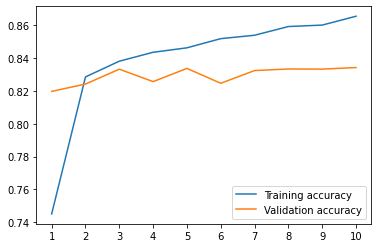

In [139]:
### Scenario 1 plot ####

import numpy as np
from matplotlib import pyplot as plt

x = np.arange(1,11)

plt.plot(x, m1.history['accuracy'], label='Training accuracy')
plt.plot(x, m1.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='lower right')
plt.xticks(x)
plt.show()

In [140]:
########################### Scenario 2 ###########################
##################################################################

### Set random seed to ensure deterministic results ###
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)

reset_random_seeds() # randomly set initial data

max_features = 1000  # Only consider the top 1k words
maxlen = 100 # Only consider the first 100 words of each movie review

### Model design with Embedding and LSTM layers ####
inputs = keras.Input(shape=(None,), dtype="int32") # This is an easy way to set an adaptive length for input sequence
x = layers.Embedding(max_features, 128)(inputs) # Embed data in a 128-dimensional vector
x = layers.LSTM(128, return_sequences=True)(x) # Add 1st layer of LSTM with 128 hidden states (aka units); set return_sequences=true.
x = layers.LSTM(128)(x) # Add 2nd layer of LSTM with 128 hidden states (aka units)
outputs = layers.Dense(1, activation='sigmoid')(x) # Add a classifier with units=1 and activation="sigmoid"

### Clear cached model to refresh memory and build new model for training ###
keras.backend.clear_session() # Clear cached model
model = keras.Model(inputs, outputs) # Build new keras model
model.summary() # Print out model summary

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compile built model with "adam", "binary_crossentropy", and metrics=["accuracy"]
m2 = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val)) # Train the compiled model using model.fit() with batch_size=64, epochs=10, and validation_data=(x_val, y_val)
print('\n\nBest validation accuracy =', max(m2.history['val_accuracy']))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         128000    
                                                                 
 lstm (LSTM)                 (None, None, 128)         131584    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 391,297
Trainable params: 391,297
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 2

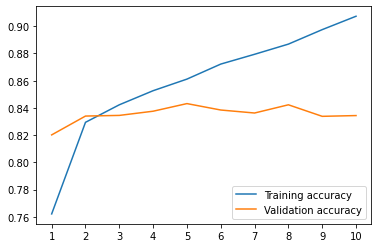

In [141]:
### Scenario 2 plot ####

import numpy as np
from matplotlib import pyplot as plt

x = np.arange(1,11)

plt.plot(x, m2.history['accuracy'], label='Training accuracy')
plt.plot(x, m2.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='lower right')
plt.xticks(x)
plt.show()

In [142]:
########################### Scenario 3 ###########################
##################################################################

### Set random seed to ensure deterministic results ###
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)

reset_random_seeds() # randomly set initial data

max_features = 1000  # Only consider the top 1k words
maxlen = 200 # Only consider the first 200 words of each movie review

### Model design with Embedding and LSTM layers ####
inputs = keras.Input(shape=(None,), dtype="int32") # This is an easy way to set an adaptive length for input sequence
x = layers.Embedding(max_features, 128)(inputs) # Embed data in a 128-dimensional vector
x = layers.LSTM(128, return_sequences=True)(x) # Add 1st layer of LSTM with 128 hidden states (aka units); set return_sequences=true.
x = layers.LSTM(128)(x) # Add 2nd layer of LSTM with 128 hidden states (aka units)
outputs = layers.Dense(1, activation='sigmoid')(x) # Add a classifier with units=1 and activation="sigmoid"

### Clear cached model to refresh memory and build new model for training ###
keras.backend.clear_session() # Clear cached model
model = keras.Model(inputs, outputs) # Build new keras model
model.summary() # Print out model summary

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compile built model with "adam", "binary_crossentropy", and metrics=["accuracy"]
m3 = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val),) # Train the compiled model using model.fit() with batch_size=64, epochs=10, and validation_data=(x_val, y_val)
print('\n\nBest validation accuracy =', max(m3.history['val_accuracy']))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         128000    
                                                                 
 lstm (LSTM)                 (None, None, 128)         131584    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 391,297
Trainable params: 391,297
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 2

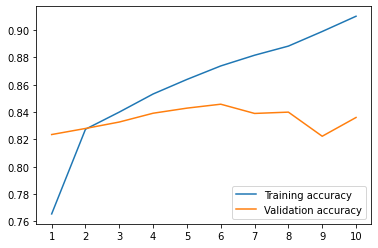

In [143]:
### Scenario 3 plot ####

import numpy as np
from matplotlib import pyplot as plt

x = np.arange(1,11)

plt.plot(x, m3.history['accuracy'], label='Training accuracy')
plt.plot(x, m3.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='lower right')
plt.xticks(x)
plt.show()